In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/carinsu4.csv')
data.head()

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ  PARENT1  MSTATUS  GENDER  \
0   63581743         0  60.0         0  11.0        0        1       0   
1  132761049         0  43.0         0  11.0        0        1       0   
2  921317019         0  48.0         0  11.0        0        1       0   
3  727598473         0  35.0         1  10.0        0        0       1   
4  450221861         0  51.0         0  14.0        0        0       0   

   EDUCATION  OCCUPATION  ...  TIF  CAR_TYPE  RED_CAR  OLDCLAIM  CLM_FREQ  \
0          3           6  ...   11         0        1    4461.0         2   
1          4           8  ...    1         0        1       0.0         0   
2          1           5  ...    1         4        1       0.0         0   
3          4           1  ...    4         5        0   38690.0         2   
4          0           8  ...    7         0        1       0.0         0   

   REVOKED  MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  
0        0        3      0.0     18.0           0  
1        0        0      0.0      1.0           0  
2        0        2      0.0     10.0           0  
3        0        3      0.0     10.0           0  
4        0        0      0.0      6.0           0  

[5 rows x 23 columns]

In [4]:
# Split features and target
X = data.drop('CLAIM_FLAG', axis=1)
y = data['CLAIM_FLAG']

# Display the encoded dataset
print(X)
print(y)


              ID  KIDSDRIV   AGE  HOMEKIDS   YOJ  PARENT1  MSTATUS  GENDER  \
0       63581743         0  60.0         0  11.0        0        1       0   
1      132761049         0  43.0         0  11.0        0        1       0   
2      921317019         0  48.0         0  11.0        0        1       0   
3      727598473         0  35.0         1  10.0        0        0       1   
4      450221861         0  51.0         0  14.0        0        0       0   
...          ...       ...   ...       ...   ...      ...      ...     ...   
10297   67790126         1  45.0         2   9.0        0        0       0   
10298   61970712         0  46.0         0   9.0        0        0       0   
10299  849208064         0  48.0         0  15.0        0        0       1   
10300  627828331         0  50.0         0   7.0        0        0       1   
10301  680381960         0  52.0         0  11.0        0        0       1   

       EDUCATION  OCCUPATION  ...  BLUEBOOK  TIF  CAR_TYPE  RED

In [5]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=31425ca09505258d8db60d929f51462fa9db20bf4b44be8a002b906ac0d121ee
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [7]:
import pandas as pd
import numpy as np
import lime
import lime.lime_tabular
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize the Extra Trees Classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the Extra Trees Classifier
extra_trees_classifier.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=[str(cls) for cls in y_train.unique()],
                                                   mode='classification')

# Define function to predict using the Extra Trees Classifier model
predict_fn = lambda x: extra_trees_classifier.predict_proba(x)

# Select an observation from the validation set for which you want to explain predictions
observation_idx = 0  # Change this index according to your choice

# Explain the prediction for the selected observation
exp = explainer.explain_instance(X_val.values[observation_idx],
                                 predict_fn,
                                 num_features=len(X_train.columns))

# Plot the explanation for feature importance
exp.show_in_notebook(show_table=True, show_all=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Actual Value: 1
Predicted Class: 1


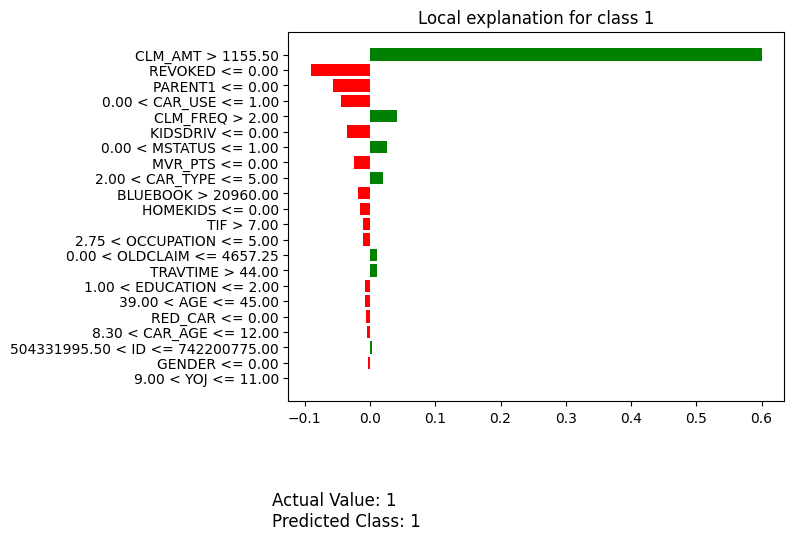

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded in X_train, X_val, y_train, y_val as per your previous code

# Train the Extra Trees Classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_classifier.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=y_train.unique(),
                                                   mode='classification')

# Define function to predict using the Extra Trees Classifier model
predict_fn = lambda x: extra_trees_classifier.predict_proba(x)

# Select an instance for which you want to explain predictions
# For example, let's say the instance is the first instance in the validation set
instance_idx = 0  # Change this index according to your choice

# Get the actual and predicted values for the selected instance
actual_value = y_val.iloc[instance_idx]
predicted_value = extra_trees_classifier.predict(X_val.values[[instance_idx]]).squeeze()

# Explain the prediction for the selected instance
exp = explainer.explain_instance(X_val.values[instance_idx],
                                 predict_fn,
                                 num_features=len(X_train.columns))

# Plot the explanation for feature importance
fig = exp.as_pyplot_figure()

# Save the plot along with actual and predicted values in a PDF file
with PdfPages('explanation_plot_classification_extra_trees.pdf') as pdf:
    pdf.savefig(fig)
    plt.text(0.1, -0.15, f"Actual Value: {actual_value}\nPredicted Class: {predicted_value}", transform=fig.transFigure, fontsize=12)

# Print actual and predicted values
print("Actual Value:", actual_value)
print("Predicted Class:", predicted_value)
